In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys
import glob

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
def compute_params(Data_df):
    
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []
    F0_norm = []
    FM_norm = []
    FS_norm = []
    
    def compute_data(i, Fmax_norm):
        try:
            phi_stat.append((Data_df.FM[i] - Data_df.FS[i]) / Data_df.FM[i])
        except:
            phi_stat.append(None)
        try:
            phi_0.append((Data_df.FM[i] - Data_df.F0[i]) / Data_df.FM[i])
        except:
            phi_0.append(None)
        NPQ.append((Fmax_norm - Data_df.FM[i]) / Data_df.FM[i])
        try:
            ETR.append(phi_stat[i] * Data_df.Actinic_intensity[i])
        except:
            ETR.append(None)
        try:
            F0_norm.append(Data_df.F0[i] / Fmax_norm) 
        except: F0_norm.append(None)
        
        FM_norm.append(Data_df.FM[i] / Fmax_norm)
        FS_norm.append(Data_df.FS[i] / Fmax_norm)
    
    for i in Data_df.index:
        Fmax_norm = Data_df[(Data_df.Experimental_index == "1A") & (Data_df.Experimental_point == 0)].FM.values.__float__()    
        compute_data(i, Fmax_norm)
        
    output = pd.DataFrame({'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR, 'F0_norm': F0_norm, 'FM_norm': FM_norm, 'FS_norm': FS_norm})
    
    return output

In [3]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Validation_croise/csv/"
Fluo_liquide = pd.read_csv(folder + "flu_liquide_standard.csv", sep=";")
Microspeedzen = pd.read_csv(folder + "microspeedzen_standard.csv", sep=";")

fig_folder = f"{folder}figs/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    


In [4]:
all_data = {'Fluo_liquide': Fluo_liquide, 'Microspeedzen': Microspeedzen}

In [5]:
Fluo_liquide[(Fluo_liquide.Experimental_index == "1A") & (Fluo_liquide.Experimental_point == 0)].FM.values.__float__()

2829.0

In [6]:
test = {}
for experiment in all_data.keys():
    test[experiment] = compute_params(all_data[experiment])

In [7]:
test

{'Fluo_liquide':     phi_stat     phi_0       NPQ        ETR   F0_norm   FM_norm   FS_norm
 0   0.755037  0.789325  0.000000   0.000000  0.210675  1.000000  0.244963
 1   0.752326  0.772727  0.012527   0.000000  0.224461  0.987628  0.244609
 2   0.575880  0.769324  0.144881  23.035208  0.201485  0.873454  0.370449
 3   0.602033  0.748780  0.150000  24.081301  0.218452  0.869565  0.346059
 4   0.551455  0.748155  0.228398  49.630916  0.205019  0.814069  0.365147
 ..       ...       ...       ...        ...       ...       ...       ...
 71  0.552912  0.676894  0.771446  49.762054  0.182397  0.564510  0.252386
 72  0.549107  0.705995  0.804209  21.964286  0.162955  0.554259  0.249912
 73  0.581098  0.669860  0.806513  23.243934  0.182750  0.553552  0.231884
 74  0.690964  0.726506  0.704217   0.000000  0.160481  0.586780  0.181336
 75  0.684690  0.702916  0.718712   0.000000  0.172853  0.581831  0.183457
 
 [76 rows x 7 columns],
 'Microspeedzen':     phi_stat     phi_0       NPQ        

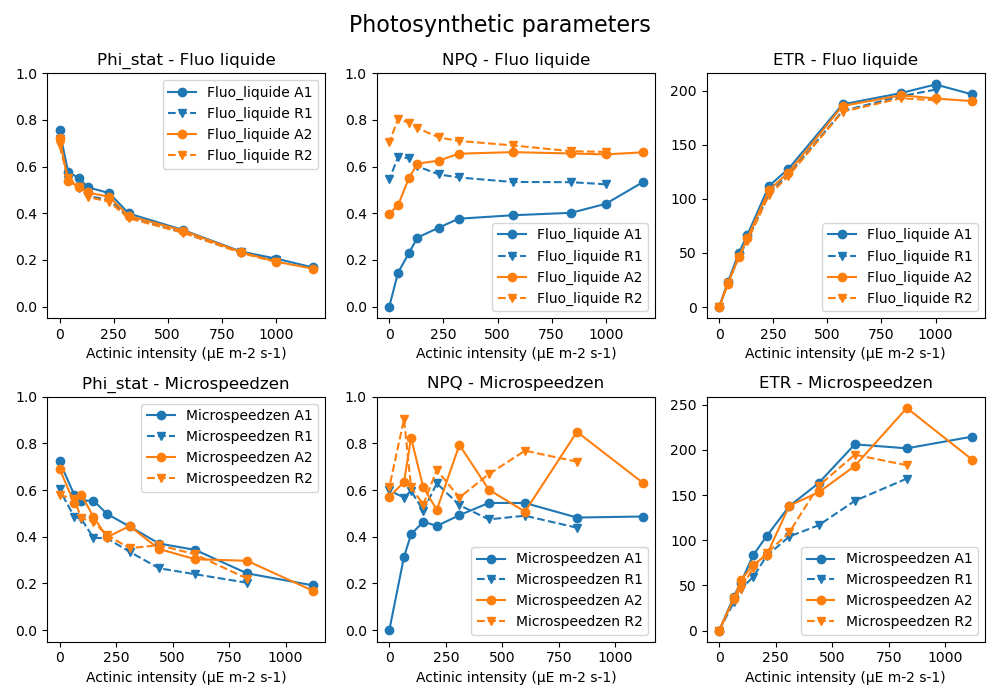

In [8]:
aller_retour = ['1A', '2A', '3A', '4A']
fmt = ['o-', 'v--','o-', 'v--']
label = ["A1", "R1", "A2", "R2"]
color = ["C0", "C0", "C1", "C1"]

fig, ax = plt.subplots(2,3, figsize=(10,7))
fig.suptitle("Photosynthetic parameters", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        phi_stat = test[experiment][(all_data[experiment].Experimental_index == run)].phi_stat
        ETR = test[experiment][(all_data[experiment].Experimental_index == run)].ETR
        NPQ = test[experiment][(all_data[experiment].Experimental_index == run)].NPQ
        ax[k, 0].plot(x, phi_stat,  fmt[i], label=f"{experiment} {label[i]}", color = color[i])
        ax[k, 1].plot(x, NPQ, fmt[i], label=f"{experiment} {label[i]}", color = color[i])
        ax[k, 2].plot(x, ETR,  fmt[i], label=f"{experiment} {label[i]}", color = color[i])


ax[0, 0].set_title("Phi_stat - Fluo liquide")
ax[0, 1].set_title("NPQ - Fluo liquide")
ax[0, 2].set_title("ETR - Fluo liquide")
ax[1, 0].set_title("Phi_stat - Microspeedzen")
ax[1, 1].set_title("NPQ - Microspeedzen")
ax[1, 2].set_title("ETR - Microspeedzen")
for i, ax in enumerate(ax.flatten()):
    ax.legend()
    ax.set_xlabel("Actinic intensity (µE m-2 s-1)")
    if i != 2 and i != 5:
        ax.set_ylim(-0.05,1)


#ax[0].legend()
#ax[1].set_ylim(0, 1)
fig.tight_layout()

fig.savefig(f"{fig_folder}params_all.png", dpi = 300)

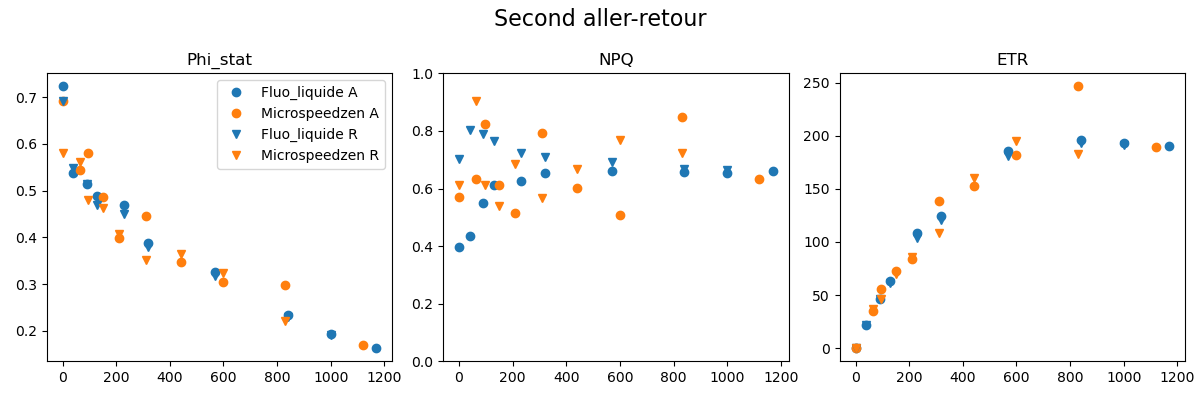

In [27]:
aller_retour = ['3A', '4A']
fmt = ['o', 'v']
label = ["A", "R"]

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Second aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        phi_stat = test[experiment][(all_data[experiment].Experimental_index == run)].phi_stat
        ETR = test[experiment][(all_data[experiment].Experimental_index == run)].ETR
        NPQ = test[experiment][(all_data[experiment].Experimental_index == run)].NPQ
        ax[0].plot(x, phi_stat,  fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[1].plot(x, NPQ, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[2].plot(x, ETR,  fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)
fig.tight_layout()

fig.savefig(f"{fig_folder}params_second_aller_retour.png", dpi = 300)

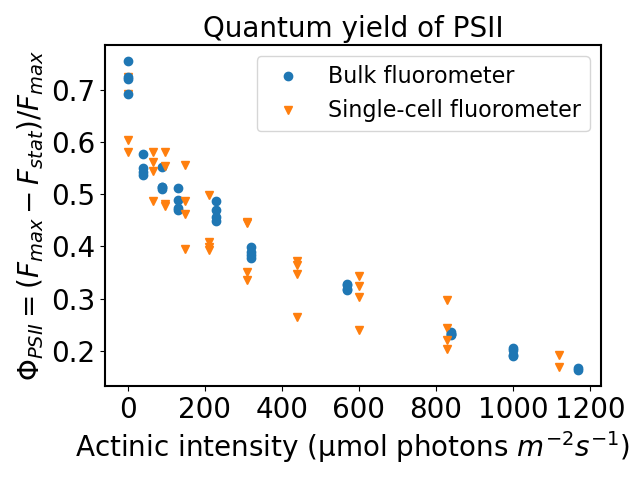

In [66]:
aller_retour = ['1A', '2A','3A', '4A']
fmt = ['o' , 'v']
label = ["Bulk fluorometer", "Single-cell fluorometer"]

fig, ax = plt.subplots()
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        phi_stat = test[experiment][(all_data[experiment].Experimental_index == run)].phi_stat
        if i == 0:
            ax.plot(x, phi_stat,  fmt[k], label=label[k], color = f"C{k}")
        else:
            ax.plot(x, phi_stat,  fmt[k], color = f"C{k}")

ax = tools.poster_axes(ax, titlesize=20, legendfontsize=16, labelsize= 20, title = "Quantum yield of PSII", xlabel = "Actinic intensity (µmol photons $m^{-2} s^{-1}$)", ylabel = "$Φ_{PSII} = (F_{max}-F_{stat})/F_{max}$")

fig.tight_layout()

fig.savefig(f"{fig_folder}phi_stat.png", dpi = 300)

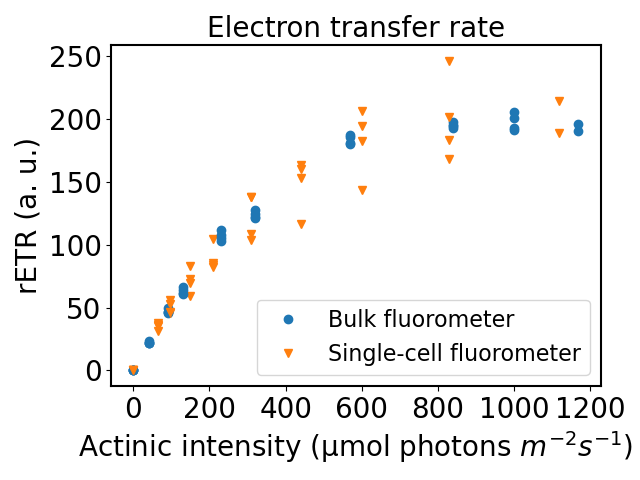

In [67]:
aller_retour = ['1A', '2A','3A', '4A']
fmt = ['o' , 'v']
label = ["Bulk fluorometer", "Single-cell fluorometer"]

fig, ax = plt.subplots()
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        ETR = test[experiment][(all_data[experiment].Experimental_index == run)].ETR
        if i == 0:
            ax.plot(x, ETR,  fmt[k], label=label[k], color = f"C{k}")
        else:
            ax.plot(x, ETR,  fmt[k], color = f"C{k}")

ax = tools.poster_axes(ax, titlesize=20, legendfontsize=16, labelsize= 20, title = "Electron transfer rate", xlabel = "Actinic intensity (µmol photons $m^{-2} s^{-1}$)", ylabel = "rETR (a. u.)")

fig.tight_layout()

fig.savefig(f"{fig_folder}ETR.png", dpi = 300)

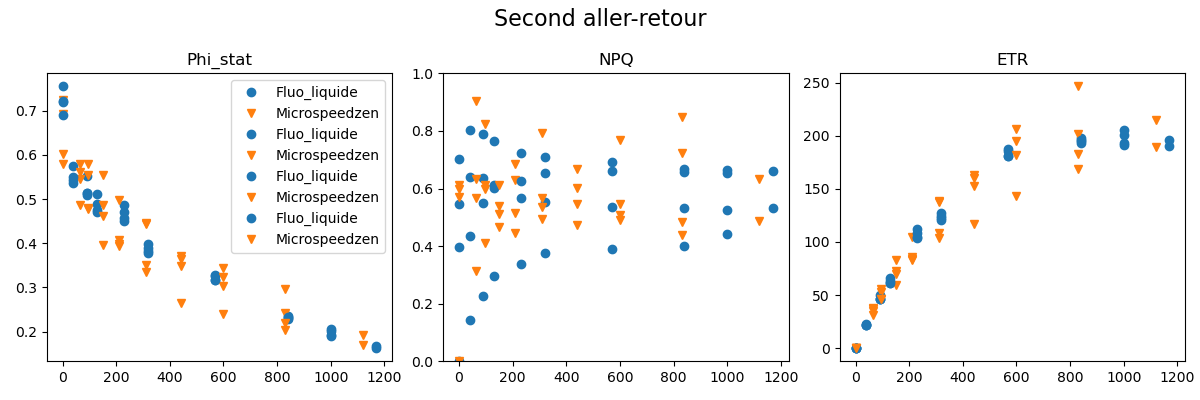

In [ ]:
aller_retour = ['1A', '2A','3A', '4A']
fmt = ['o' , 'v']

fig, ax = plt.subplots()
fig.suptitle("Second aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        phi_stat = test[experiment][(all_data[experiment].Experimental_index == run)].phi_stat
        ETR = test[experiment][(all_data[experiment].Experimental_index == run)].ETR
        NPQ = test[experiment][(all_data[experiment].Experimental_index == run)].NPQ
        ax.plot(x, phi_stat,  fmt[k], label=f"{experiment}", color = f"C{k}")
        ax[1].plot(x, NPQ, fmt[k], color = f"C{k}")
        ax[2].plot(x, ETR,  fmt[k], color = f"C{k}")

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)
fig.tight_layout()

fig.savefig(f"{fig_folder}params_second_aller_retour.png", dpi = 300)

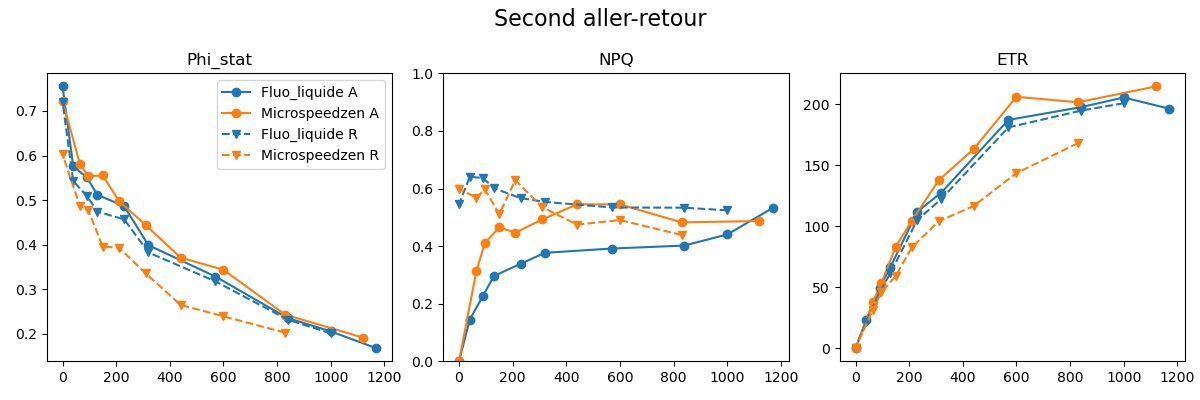

In [10]:
aller_retour = ['1A', '2A']
fmt = ['o', 'v']
label = ["A", "R"]

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Second aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        phi_stat = test[experiment][(all_data[experiment].Experimental_index == run)].phi_stat
        ETR = test[experiment][(all_data[experiment].Experimental_index == run)].ETR
        NPQ = test[experiment][(all_data[experiment].Experimental_index == run)].NPQ
        ax[0].plot(x, phi_stat,  fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[1].plot(x, NPQ, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[2].plot(x, ETR,  fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)
fig.tight_layout()

fig.savefig(f"{fig_folder}params_first_aller_retour.png", dpi = 300)

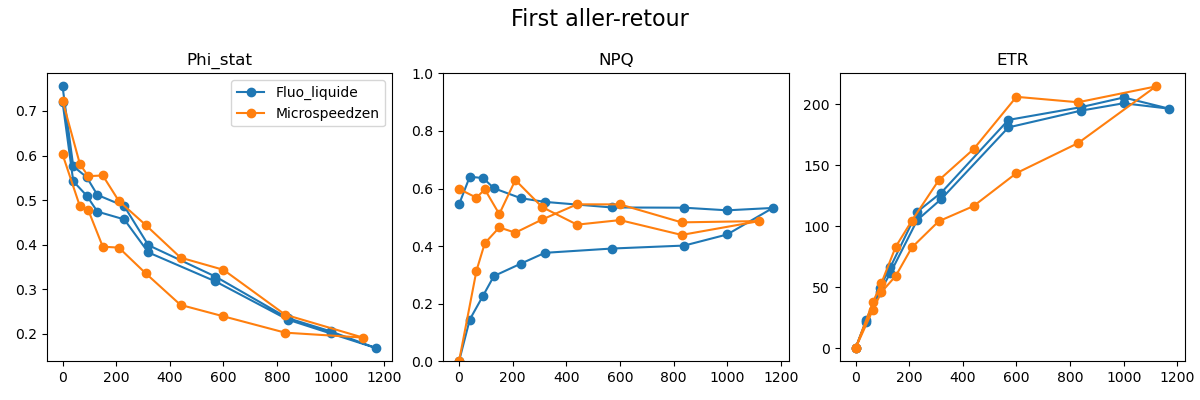

In [11]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("First aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    phi_stat = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].phi_stat
    ETR = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].ETR
    NPQ = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].NPQ
    ax[0].plot(x, phi_stat, 'o-', label=experiment)
    ax[1].plot(x, NPQ, 'o-', label=experiment)
    ax[2].plot(x, ETR, 'o-', label=experiment)

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()
ax[1].set_ylim(0, 1)

fig.tight_layout()
fig.savefig(f"{fig_folder}params_first_aller_retour.png", dpi = 300)

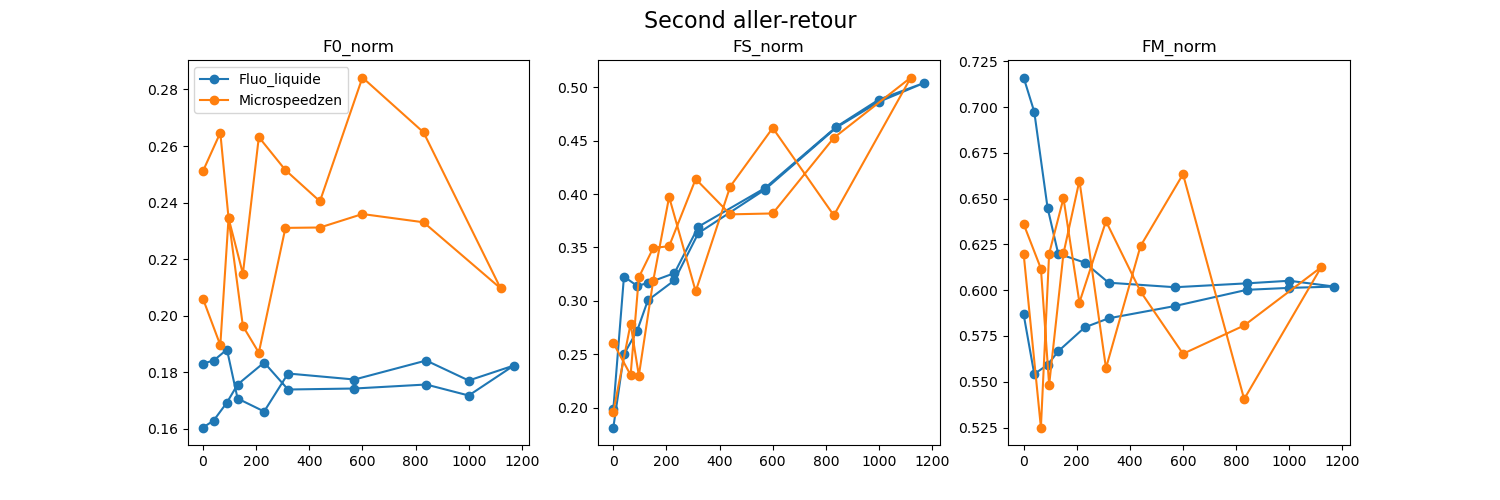

In [12]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Second aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax[0].plot(x, F0_norm, 'o-', label=experiment)
    ax[1].plot(x, FS_norm, 'o-', label=experiment)
    ax[2].plot(x, FM_norm, 'o-', label=experiment)

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[0].legend()


fig.savefig(f"{fig_folder}fluo_second_aller_retour.png", dpi = 300)

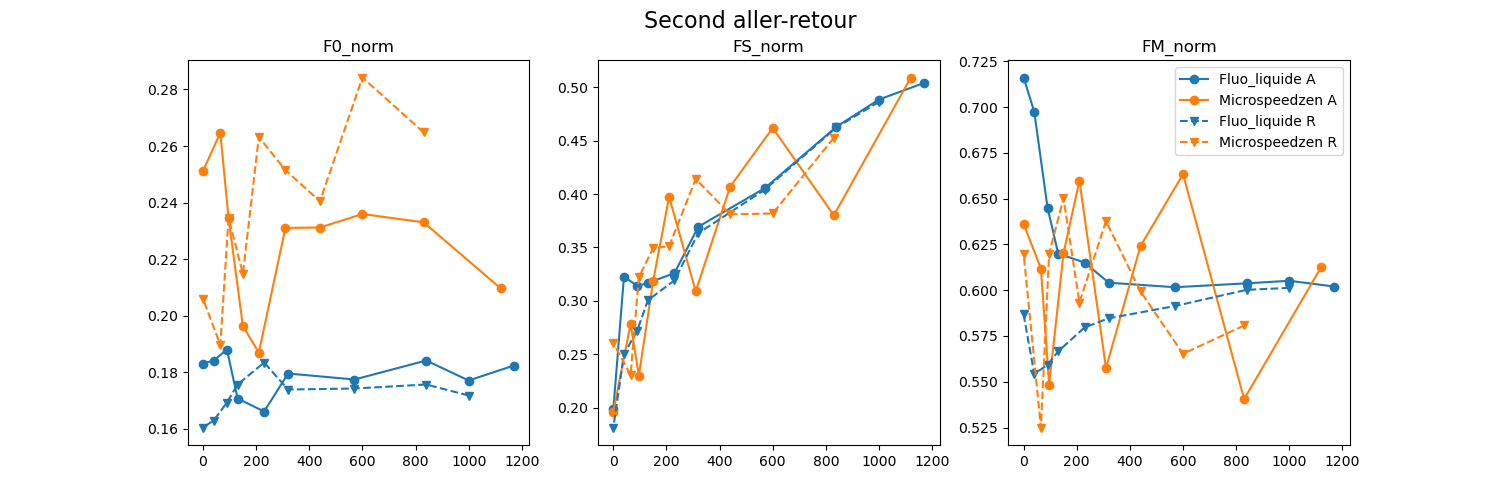

In [13]:
aller_retour = ['3A', '4A']
fmt = ['o-', 'v--']
label = ["A", "R"]

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Second aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        F0_norm = test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm
        FS_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FS_norm
        FM_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm

        ax[0].plot(x, F0_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[1].plot(x, FS_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[2].plot(x, FM_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[2].legend()


fig.savefig(f"{fig_folder}fluo_second_aller_retour.png", dpi = 300)

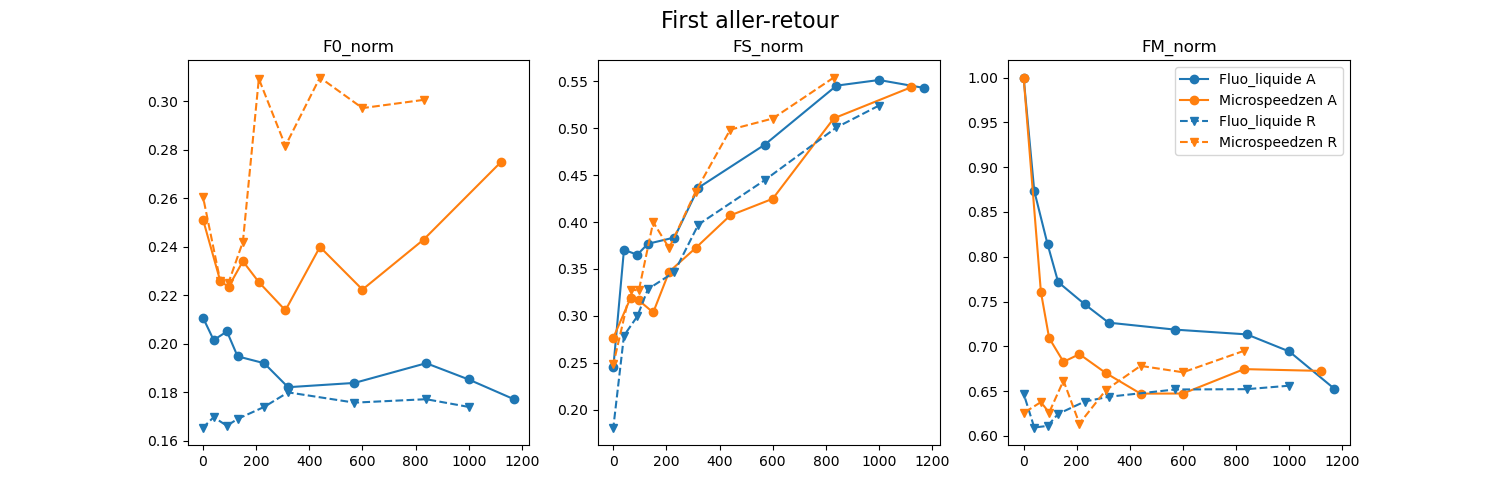

In [14]:
aller_retour = ['1A', '2A']
fmt = ['o-', 'v--']
label = ["A", "R"]

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("First aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        F0_norm = test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm
        FS_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FS_norm
        FM_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm

        ax[0].plot(x, F0_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[1].plot(x, FS_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax[2].plot(x, FM_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[2].legend()


fig.savefig(f"{fig_folder}fluo_first_aller_retour.png", dpi = 300)

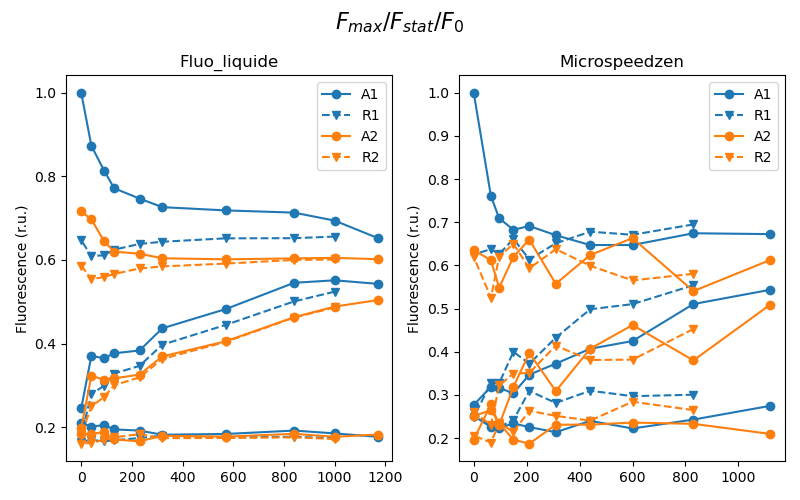

In [15]:
aller_retour = ['1A', '2A', '3A', '4A']
fmt = ['o-', 'v--','o-', 'v--']
label = ["A1", "R1", "A2", "R2"]
color = ["C0", "C0", "C1", "C1"]

fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.suptitle("$F_{max} / F_{stat} / F_{0}$ ", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        F0_norm = test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm
        FS_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FS_norm
        FM_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm

        ax[k].plot(x, F0_norm, fmt[i], label=f"{label[i]}", color = color[i])
        ax[k].plot(x, FS_norm, fmt[i], color = color[i])
        ax[k].plot(x, FM_norm, fmt[i], color = color[i])
        ax[k].set_title(experiment)

[ax.set_ylabel('Fluorescence (r.u.)') for ax in ax]
#[ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') for ax in ax]
[ax.legend() for ax in ax]
fig.tight_layout()

fig.savefig(f"{fig_folder}fluo_all.png", dpi = 300)

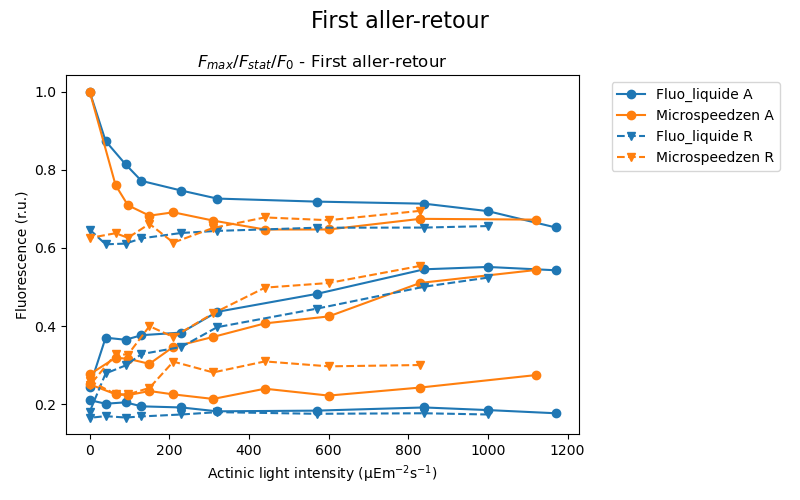

In [16]:
aller_retour = ['1A', '2A']
fmt = ['o-', 'v--']
label = ["A", "R"]

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle("First aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        F0_norm = test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm
        FS_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FS_norm
        FM_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm

        ax.plot(x, F0_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax.plot(x, FS_norm, fmt[i], color = f"C{k}")
        ax.plot(x, FM_norm, fmt[i], color = f"C{k}")


ax.set_title("$F_{max} / F_{stat} / F_{0}$ - First aller-retour")
ax.set_xlabel('Actinic light intensity (µEm$^{-2}$s$^{-1}$)')
ax.set_ylabel('Fluorescence (r.u.)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()

fig.savefig(f"{fig_folder}fluo_first_aller_retour_all.png", dpi = 300)

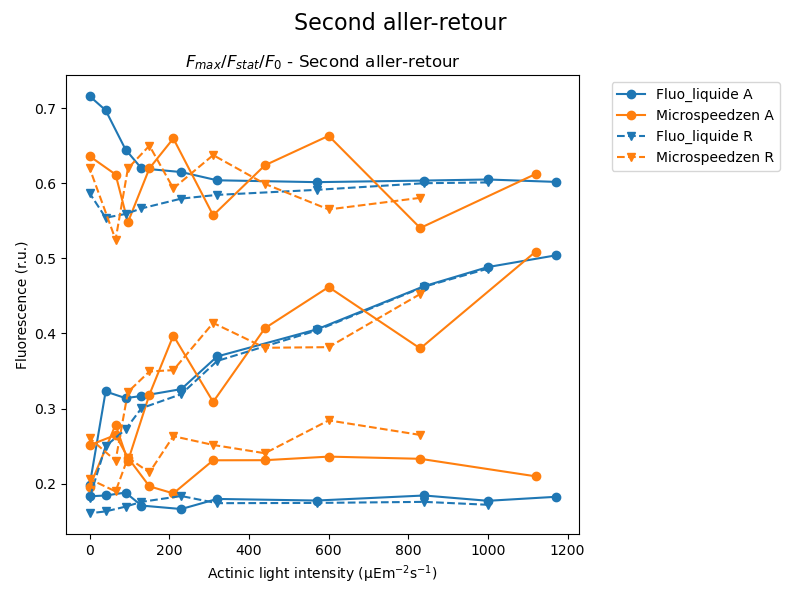

In [17]:
aller_retour = ['3A', '4A']
fmt = ['o-', 'v--']
label = ["A", "R"]

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle("Second aller-retour", fontsize=16)
for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        x = all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity
        F0_norm = test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm
        FS_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FS_norm
        FM_norm = test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm

        ax.plot(x, F0_norm, fmt[i], label=f"{experiment} {label[i]}", color = f"C{k}")
        ax.plot(x, FS_norm, fmt[i], color = f"C{k}")
        ax.plot(x, FM_norm, fmt[i], color = f"C{k}")


ax.set_title("$F_{max} / F_{stat} / F_{0}$ - Second aller-retour")
ax.set_xlabel('Actinic light intensity (µEm$^{-2}$s$^{-1}$)')
ax.set_ylabel('Fluorescence (r.u.)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()


fig.savefig(f"{fig_folder}fluo_second_aller_retour_all.png", dpi = 300)

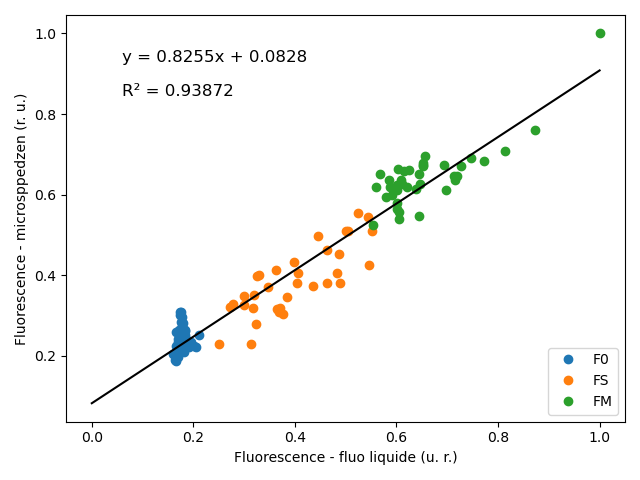

In [22]:
importlib.reload(tools)
aller_retour = ['1A', '2A', '3A', '4A']
fmt = ['o-', 'v--','o-', 'v--']
label = ["A1", "R1", "A2", "R2"]
color = ["C0", "C0", "C1", "C1"]
F0_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FS_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FM_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
all_fluo = {'Fluo_liquide': [], 'Microspeedzen': []}

for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        F0_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm.tolist())
        FS_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run) & (all_data[experiment].Actinic_intensity != 0)].FS_norm.tolist())
        FM_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm.tolist())
        all_fluo[experiment].extend(F0_norm[experiment] + FS_norm[experiment] + FM_norm[experiment])

        

    
fig, ax = plt.subplots()
ax.plot(F0_norm['Fluo_liquide'], F0_norm['Microspeedzen'], 'o', label = "F0")
ax.plot(FS_norm['Fluo_liquide'], FS_norm['Microspeedzen'], 'o',  label = "FS")
ax.plot(FM_norm['Fluo_liquide'], FM_norm['Microspeedzen'], 'o', label = "FM")
popt, xfit, yfit, r2 = tools.lin_fit(all_fluo['Fluo_liquide'], all_fluo['Microspeedzen'], 0, 1, 10, Force_zero= False)
ax.plot(xfit, yfit, 'k')
ax.text(0.1, 0.8, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\n\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 12)
ax.set_xlabel("Fluorescence - fluo liquide (u. r.)")
ax.set_ylabel("Fluorescence - microsppedzen (r. u.)")
ax.legend(loc = 'lower right')
fig.tight_layout()
fig.savefig(f"{fig_folder}fluo_compare.png", dpi = 300)


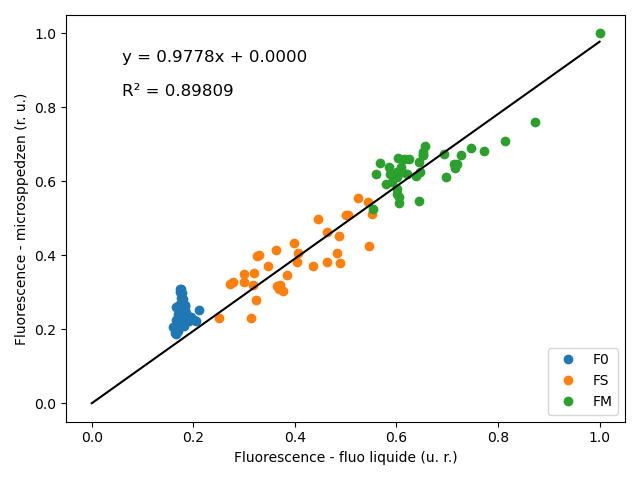

In [23]:
importlib.reload(tools)
aller_retour = ['1A', '2A', '3A', '4A']
fmt = ['o-', 'v--','o-', 'v--']
label = ["A1", "R1", "A2", "R2"]
color = ["C0", "C0", "C1", "C1"]
F0_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FS_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FM_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
all_fluo = {'Fluo_liquide': [], 'Microspeedzen': []}



for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        F0_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm.tolist())
        FS_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run) & (all_data[experiment].Actinic_intensity != 0)].FS_norm.tolist())
        FM_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm.tolist())
        all_fluo[experiment].extend(F0_norm[experiment] + FS_norm[experiment] + FM_norm[experiment])

        

    
fig, ax = plt.subplots()
ax.plot(F0_norm['Fluo_liquide'], F0_norm['Microspeedzen'], 'o', label = "F0")
ax.plot(FS_norm['Fluo_liquide'], FS_norm['Microspeedzen'], 'o',  label = "FS")
ax.plot(FM_norm['Fluo_liquide'], FM_norm['Microspeedzen'], 'o', label = "FM")
popt, xfit, yfit, r2 = tools.lin_fit(all_fluo['Fluo_liquide'], all_fluo['Microspeedzen'], 0, 1, 10, Force_zero= True)
ax.plot(xfit, yfit, 'k')
ax.text(0.1, 0.8, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\n\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 12)
ax.set_xlabel("Fluorescence - fluo liquide (u. r.)")
ax.set_ylabel("Fluorescence - microsppedzen (r. u.)")
ax.legend(loc = 'lower right')
fig.tight_layout()
fig.savefig(f"{fig_folder}fluo_compare_force_zero.png", dpi = 300)


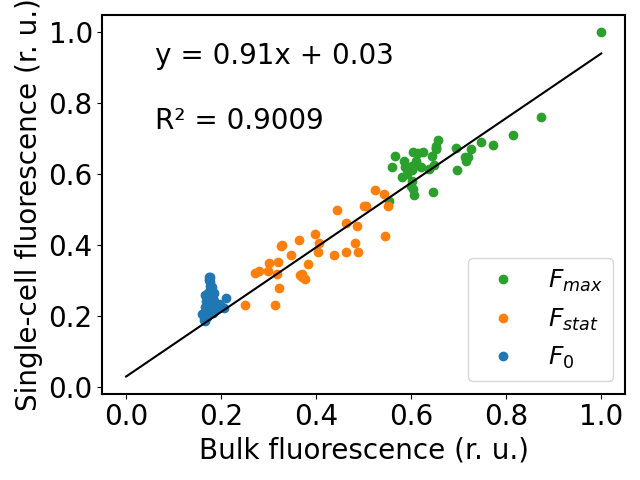

In [71]:
importlib.reload(tools)
aller_retour = ['1A', '2A', '3A', '4A']
fmt = ['o-', 'v--','o-', 'v--']
label = ["A1", "R1", "A2", "R2"]
color = ["C0", "C0", "C1", "C1"]
F0_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FS_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FM_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
all_fluo = {'Fluo_liquide': [], 'Microspeedzen': []}



for i, run in enumerate(aller_retour):
    for k, experiment in enumerate(all_data.keys()):
        F0_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm.tolist())
        FS_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run) & (all_data[experiment].Actinic_intensity != 0)].FS_norm.tolist())
        FM_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm.tolist())
        all_fluo[experiment].extend(FS_norm[experiment] + FM_norm[experiment])

        

    
fig, ax = plt.subplots()
ax.plot(FM_norm['Fluo_liquide'], FM_norm['Microspeedzen'], 'o', color = 'C2', label = '$F_{max}$')
ax.plot(FS_norm['Fluo_liquide'], FS_norm['Microspeedzen'], 'o', color = 'C1', label = '$F_{stat}$')
ax.plot(F0_norm['Fluo_liquide'], F0_norm['Microspeedzen'], 'o', color = 'C0', label = '$F_{0}$')

popt, xfit, yfit, r2 = tools.lin_fit(all_fluo['Fluo_liquide'], all_fluo['Microspeedzen'], 0, 1, 10, Force_zero= False)
ax.plot(xfit, yfit, 'k')
ax.text(0.1, 0.7, f"y = {popt[0]:.2f}x + {popt[1]:.2f}\n\nR² = {r2:.4f}", transform=ax.transAxes, fontsize = 20)
ax.set_xlabel("Fluorescence - fluo liquide (u. r.)")
ax.set_ylabel("Fluorescence - microsppedzen (r. u.)")

ax = tools.poster_axes(ax,  titlesize=20, legendfontsize=16, labelsize= 20, title = None, xlabel = "Bulk fluorescence (r. u.)", ylabel = "Single-cell fluorescence (r. u.)")
ax.legend(loc = 'lower right', fontsize = 18)

fig.tight_layout()
fig.savefig(f"{fig_folder}fluo_compare_sansF0_poster.png", dpi = 300)


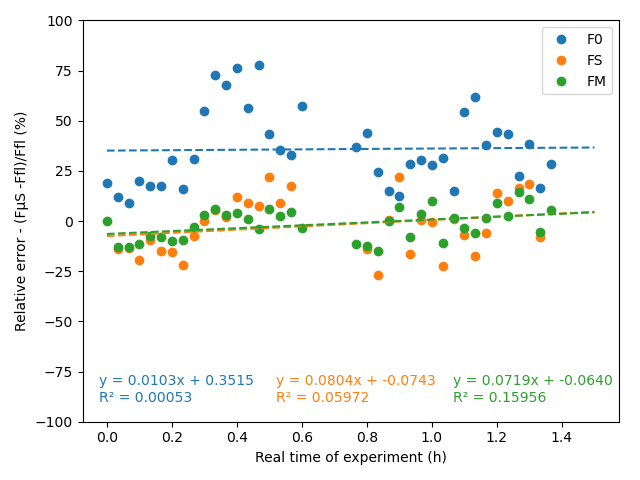

In [21]:
aller_retour = ['1A', '2A', '3A', '4A']
F0_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FS_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
FM_norm = {'Fluo_liquide': [], 'Microspeedzen': []}
I = []

for i, run in enumerate(aller_retour):
    I.extend(all_data[experiment][(all_data[experiment].Experimental_index == run)].Actinic_intensity)
    for k, experiment in enumerate(all_data.keys()):
        F0_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].F0_norm.tolist())
        FS_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run) & (all_data[experiment].Actinic_intensity != 0)].FS_norm.tolist())
        FM_norm[experiment].extend(test[experiment][(all_data[experiment].Experimental_index == run)].FM_norm.tolist())
        


real_time = pd.read_csv(fig_folder + "real_time.csv").Real_time[::2]
real_time.reset_index(drop=True, inplace=True)
rea_time_FS = real_time.drop([0,18,19,37])
real_time = real_time/60
rea_time_FS = rea_time_FS/60

error_F0 = (np.array(F0_norm["Microspeedzen"]) - np.array(F0_norm["Fluo_liquide"]))/np.array(F0_norm["Fluo_liquide"])
error_FS = (np.array(FS_norm["Microspeedzen"]) - np.array(FS_norm["Fluo_liquide"]))/np.array(FS_norm["Fluo_liquide"])
error_FM = (np.array(FM_norm["Microspeedzen"]) - np.array(FM_norm["Fluo_liquide"]))/np.array(FM_norm["Fluo_liquide"])



fig, ax = plt.subplots()
ax.plot(real_time, error_F0*100, 'o', label = "F0", linewidth = 0.2)
ax.plot(rea_time_FS, error_FS*100, 'o', label = "FS", linewidth = 0.2)
ax.plot(real_time, error_FM*100, 'o', label = "FM", linewidth = 0.2)
ax.set_ylim(-100, 100)

popt, xfit, yfit, r2 = tools.lin_fit(real_time, error_F0, 0, 1.5, 10)
ax.plot(xfit, yfit*100, '--', color = 'C0')
ax.text(0.03, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C0')

popt, xfit, yfit, r2 = tools.lin_fit(rea_time_FS, error_FS, 0, 1.5, 10)
ax.plot(xfit, yfit*100, '--', color = 'C1')
ax.text(0.36, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C1')

popt, xfit, yfit, r2 = tools.lin_fit(real_time, error_FM, 0, 1.5, 10)
ax.plot(xfit, yfit*100, '--', color = 'C2')
ax.text(0.69, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C2')

ax.legend()

ax.set_xlabel("Real time of experiment (h)")
ax.set_ylabel("Relative error - (FµS -Ffl)/Ffl (%)")

fig.tight_layout()

fig.savefig(fig_folder + "rel_error.png", dpi = 300)

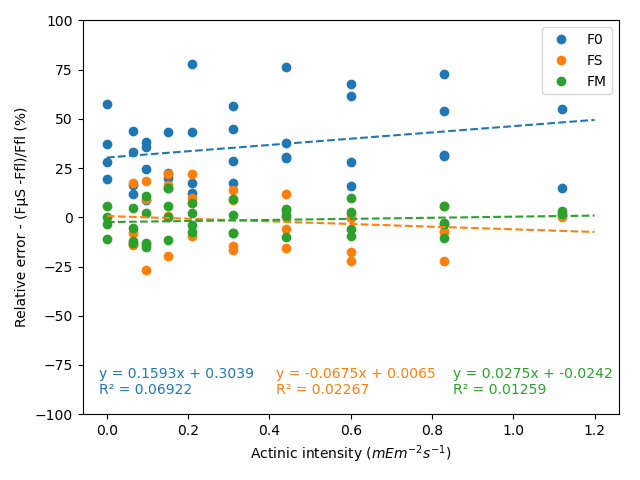

In [22]:
fig, ax = plt.subplots()
I_FS = pd.Series(I).drop([0,18,19,37])
I_mE = np.array(I)/1000
I_FS_mE = np.array(I_FS)/1000
ax.plot(I_mE, error_F0*100, 'o', label = "F0", linewidth = 0.2)
ax.plot(I_FS_mE, error_FS*100, 'o', label = "FS", linewidth = 0.2)
ax.plot(I_mE, error_FM*100, 'o', label = "FM", linewidth = 0.2)
ax.set_ylim(-100, 100)


popt, xfit, yfit, r2 = tools.lin_fit(I_mE, error_F0, 0, 1.2, 10)
ax.plot(xfit, yfit*100, '--', color = 'C0')
ax.text(0.03, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C0')

popt, xfit, yfit, r2 = tools.lin_fit(I_FS_mE, error_FS, 0, 1.2, 10)
ax.plot(xfit, yfit*100, '--', color = 'C1')
ax.text(0.36, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C1')

popt, xfit, yfit, r2 = tools.lin_fit(I_mE, error_FM, 0, 1.2, 10)
ax.plot(xfit, yfit*100, '--', color = 'C2')
ax.text(0.69, 0.05, f"y = {popt[0]:.4f}x + {popt[1]:.4f}\nR² = {r2:.5f}", transform=ax.transAxes, fontsize = 10, color = 'C2')


ax.legend()

ax.set_xlabel("Actinic intensity ($mEm^{-2}s^{-1}$)")
ax.set_ylabel("Relative error - (FµS -Ffl)/Ffl (%)")

fig.tight_layout()

fig.savefig(fig_folder + "rel_error_I.png", dpi = 300)

In [23]:
single_cell = pd.read_csv("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Validation_croise/Microspeedzen.csv", sep = ';')
single_cell

,Experimental_point,Actinic_intensity,Experimental_index,nb_cells,cell,nb_pixels,F0,FS,F0_avg,FS_avg,FM
0,0,0,1A,38,0,18,0.400000,0.066667,0.177778,0.203030,1.177778
1,0,0,1A,38,1,149,0.673826,0.740940,0.620805,0.661623,2.687248
2,0,0,1A,38,2,85,0.547059,0.394118,0.550588,0.596257,2.535294
3,0,0,1A,38,3,93,0.446237,0.618280,0.434409,0.498045,1.586021
4,0,0,1A,38,4,37,0.543243,0.651351,0.513513,0.597297,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,4A,38,34,86,0.219767,0.277907,0.120284,0.359302,0.556977
1478,0,0,4A,38,35,74,0.548649,0.440541,0.514114,0.649386,1.886486
1479,0,0,4A,38,36,205,0.237073,0.451707,0.285854,0.437960,1.246829
1480,0,0,4A,38,37,46,0.689130,0.689130,0.462077,0.623913,1.210870


In [24]:
def compute_params_single_cell(Data_df_all_cells):
    nb_cells = Data_df_all_cells.cell.max()
    output = []
    nb_pixels = []
    for cell in range(nb_cells + 1):
        Data_df = Data_df_all_cells[Data_df_all_cells.cell == cell]
        Data_df.reset_index(drop=True, inplace=True)
        Actinic_intensity = []
        phi_stat = []
        phi_0 = []
        NPQ = []
        ETR = []
        F0_norm = []
        FM_norm = []
        FS_norm = []
        
        def compute_data(i, Fmax_norm):
          
            phi_stat.append((Data_df.FM[i] - Data_df.FS[i]) / Data_df.FM[i])
            phi_0.append((Data_df.FM[i] - Data_df.F0[i]) / Data_df.FM[i])
            NPQ.append((Fmax_norm - Data_df.FM[i]) / Data_df.FM[i])
            ETR.append(phi_stat[i] * Data_df.Actinic_intensity[i])
            F0_norm.append(Data_df.F0[i] / Fmax_norm) 
            
            FM_norm.append(Data_df.FM[i] / Fmax_norm)
            FS_norm.append(Data_df.FS[i] / Fmax_norm)
            Actinic_intensity.append(Data_df.Actinic_intensity[i])
        
        for i in Data_df.index:
            Fmax_norm = Data_df[(Data_df.Experimental_index == "1A") & (Data_df.Experimental_point == 0)].FM.values.__float__()    
            compute_data(i, Fmax_norm)
            
        output.append(pd.DataFrame({'Actinic_intensity': Actinic_intensity,'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR, 'F0_norm': F0_norm, 'FM_norm': FM_norm, 'FS_norm': FS_norm}))
        nb_pixels.append(Data_df.nb_pixels.values[0])
        
    return output, nb_pixels

In [25]:
output, nb_pixels = compute_params_single_cell(single_cell)

In [26]:
nb_cells = len(output)
phi_stat = []

for cell in range(nb_cells):
    aux = []
    for i, int in enumerate(output[cell].Actinic_intensity.unique()):
        aux.append(output[cell][output[cell].Actinic_intensity == int].phi_stat.mean())
    phi_stat.append(aux)
    
    

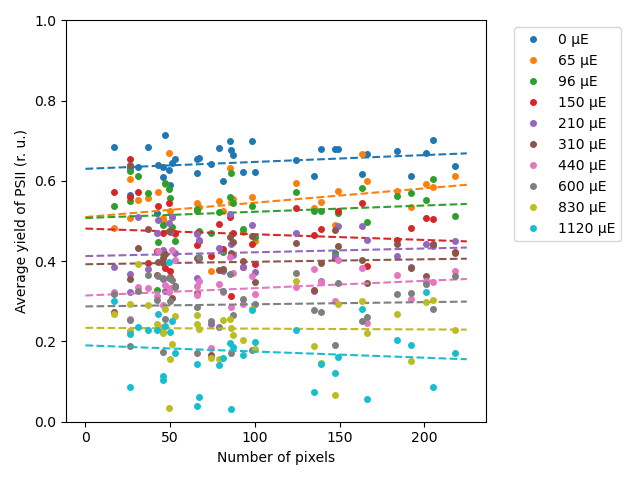

In [27]:
importlib.reload(tools)
Actinic_intensity = output[0].Actinic_intensity.unique()
popt = []
r2 = []
slope_error = []
intercept_error = []

fig, ax = plt.subplots()
for i, int in enumerate(Actinic_intensity):
    ax.plot(nb_pixels[1:], [x[i] for x in phi_stat][1:], 'o', label = f"{int} µE", markersize = 4, color = f"C{i}")
    aux_popt, xfit, yfit, aux_r2, aux_slope_error, aux_intercept_error = tools.lin_fit(nb_pixels[1:], [x[i] for x in phi_stat][1:], 0, 225, 10, stats=True)
    popt.append(aux_popt)
    r2.append(aux_r2)
    slope_error.append(aux_slope_error)
    intercept_error.append(aux_intercept_error)
    ax.plot(xfit, yfit, '--', color = f"C{i}")
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Number of pixels")
ax.set_ylabel("Average yield of PSII (r. u.)")
fig.tight_layout()
fig.savefig(fig_folder + "nb_pixels.png", dpi = 300)

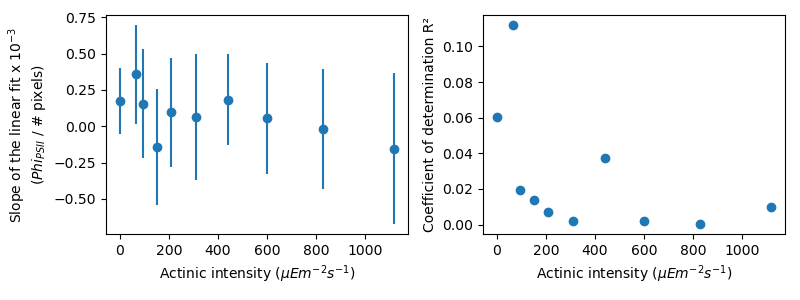

In [28]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].errorbar(Actinic_intensity, [x[0]*1000 for x in popt], yerr = np.array(slope_error)*1000, fmt = 'o', markersize = 6)
ax[1].plot(Actinic_intensity, r2, 'o', markersize = 6)
ax[0].set_xlabel("Actinic intensity $(µE m^{-2} s^{-1})$")
ax[1].set_xlabel("Actinic intensity $(µE m^{-2} s^{-1})$")
ax[0].set_ylabel("Slope of the linear fit x $10^{-3}$\n($Phi_{PSII}$ / # pixels)")
ax[1].set_ylabel("Coefficient of determination R²")
fig.tight_layout()
fig.savefig(fig_folder + "fit_params_pixels.png", dpi = 300)
